<AxesSubplot:>

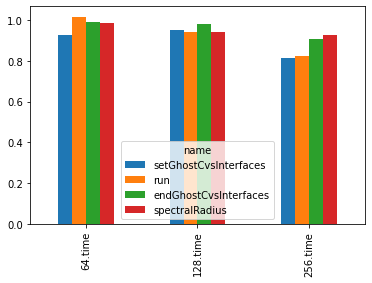

In [1]:
import hatchet as ht
import glob

dirs = glob.glob(
    "/mnt/c/Users/onurc/Desktop/Work/Projects/chopper-data/tortuga-weak-scaling/cubex-32ppn-nopapi/tortuga-cubex*",
    recursive=True,
)

p_dir = []
for dir in dirs:
    p_dir.append([int(dir.split("-")[-1]), dir])
dirs = sorted(p_dir, key=lambda l: l[0])

data = [path[1] + "/profile.cubex" for path in dirs[1:]]
gfs = ht.GraphFrame.construct_from(data)

for idx in range(len(gfs)):
    gfs[idx].update_metadata(int(dirs[idx+1][0]))

tortuga_eff = ht.Chopper.speedup_efficiency(gfs, weak=True, efficiency=True)

disp_mets = ["name","64.time", "128.time", "256.time"]
tortuga_eff = tortuga_eff[disp_mets]
tortuga_eff_filt = tortuga_eff.loc[~(tortuga_eff['name'].str.contains("MPI"))]
tortuga_eff_filt = tortuga_eff_filt.loc[~(tortuga_eff_filt['name'].str.contains("MEASUREMENT"))]
tortuga_eff_filt = tortuga_eff_filt.loc[~(tortuga_eff_filt['name'].str.contains("write"))]
tortuga_eff_filt = tortuga_eff_filt.loc[~(tortuga_eff_filt['name'].str.contains("cLesSolver_v3.0"))]
tortuga_eff_filt.reset_index(drop=True, inplace=True)
tortuga_eff_filt.set_index("name", inplace=True)
tortuga_eff_filt = tortuga_eff_filt[["64.time", "128.time", "256.time"]]
# display(tortuga_eff_filt)

tortuga_eff_filt.head(4).T.loc[: , :].plot.bar()